## Setup

In [1]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd## Plotting Data
import numpy as np

from IPython.display import display

## Police Shootings Data into DataFrame

In [2]:
# File to Load (change files of police data for each city)
police_shootings_data = "fatal-police-shootings-data.csv"
# police_shootings_data = "police_fatal_shootings.csv"

# Raw Data Frame
df = pd.DataFrame(pd.read_csv(police_shootings_data))

# Refined Data Frame
police_shootings_df = df[["date","armed","age","gender","signs_of_mental_illness","body_camera"]]

# Adding datetime
police_shootings_df["date"] = pd.to_datetime(police_shootings_df["date"])

mask = (police_shootings_df["date"] > "2015-01-01") & (police_shootings_df["date"] <= "2018-12-31")
clean_date = police_shootings_df.loc[mask]
clean_date.head()

# Dropped NaN from "armed"
police_shootings_df = police_shootings_df.dropna(axis=0, how='any')
police_shootings_df = police_shootings_df.reset_index(drop = True)

/Users/danielconde/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [3]:
# Adding Year Column
cut_points = pd.to_datetime([np.datetime64("2015-01-01"), np.datetime64("2015-12-31"), np.datetime64("2016-12-31"), np.datetime64("2017-12-31"), np.datetime64("2018-12-31")])

group_names = ["2015", "2016", "2017", "2018"]
police_shootings_df["year"] = pd.cut(police_shootings_df["date"], cut_points, labels=group_names)

# Getting Rid of 2019 onwards
police_shootings_df = police_shootings_df.dropna(axis=0, how='any')


## New Weapon DataFrames

In [4]:
# DataFrame Column Method
weapons_list_df = police_shootings_df[["year","armed"]]
weapons_list_df = weapons_list_df.groupby("year")

count_list = weapons_list_df["armed"].value_counts().to_frame()
count_list = count_list.rename(columns={"armed": "count"})
count_list = count_list.reset_index()
count_list = count_list.groupby("year").head()

# Creating sub dfs from main df and saving as keys in a dictionary
most_common_weapons = {}
year_list = ["2015","2016","2017","2018"]

for thing in year_list:
    most_common_weapons[thing] = count_list.loc[count_list["year"]==thing]

## Creating Subplot of Bar Graphs

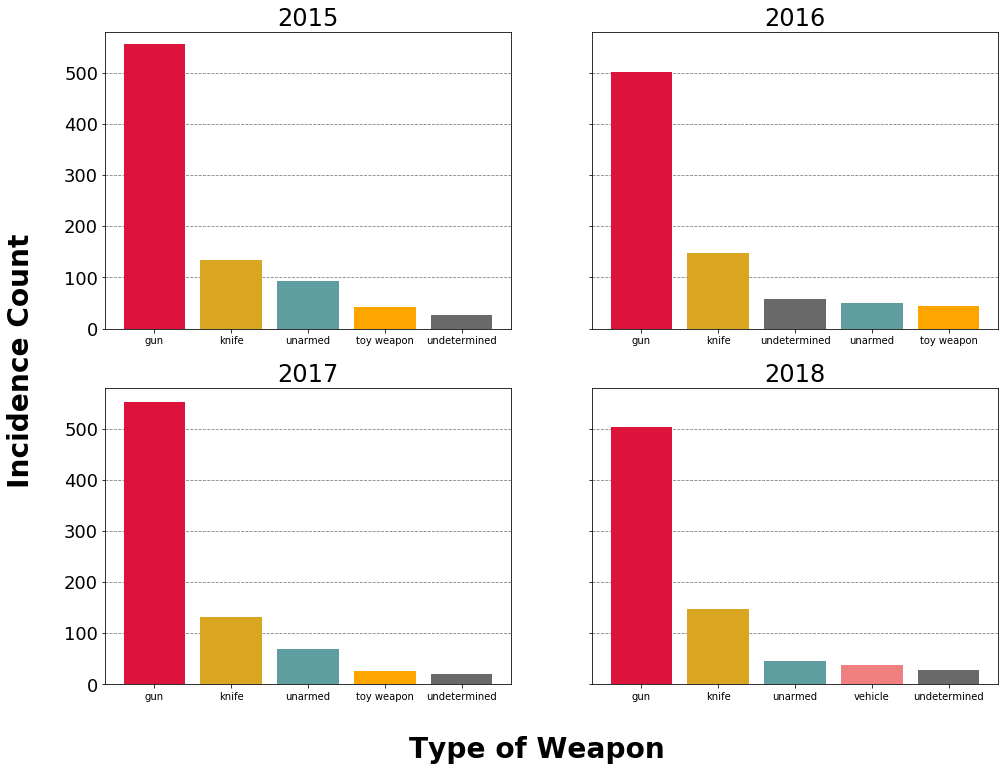

In [5]:
# The Subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
fig.text(0.5, 0.04, 'Type of Weapon', ha='center', fontsize=28, fontweight="bold")
fig.text(0.04, 0.5, 'Incidence Count', va='center', rotation='vertical', fontsize=28, fontweight="bold")

# plt.suptitle("Most Commonly Used Weapons in Cases of Fatal Police Shootings", fontsize=24, fontweight="bold")


# Each Axis


# 2015
x_axis_2015 = np.arange(len(most_common_weapons["2015"]["armed"]))
y_axis_2015 = most_common_weapons["2015"]["count"]

ax1.bar(x_axis_2015, y_axis_2015, color=['crimson', 'goldenrod', 'cadetblue', 'orange', 'dimgrey'])
ax1.set_ylim([0, 580])
ax1.title.set_text("2015")
ax1.title.set_size(24)

tick_locations_2015 = [value for value in x_axis_2015]
ax1.set_xticks(tick_locations_2015)
ax1.set_xticklabels(most_common_weapons["2015"]["armed"])

ax1.tick_params(axis='x', labelsize=10)
# ax1.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax1.tick_params(axis='y', labelsize=18)

ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')

# 2016
x_axis_2016 = np.arange(len(most_common_weapons["2016"]["armed"]))
y_axis_2016 = most_common_weapons["2016"]["count"]

ax2.bar(x_axis_2016, y_axis_2016, color=['crimson', 'goldenrod', 'dimgrey', 'cadetblue', 'orange'])
ax2.set_ylim([0, 580])
ax2.title.set_text("2016")
ax2.title.set_size(24)

tick_locations_2016 = [value for value in x_axis_2016]
ax2.set_xticks(tick_locations_2016)
ax2.set_xticklabels(most_common_weapons["2016"]["armed"])

ax2.tick_params(axis='x', labelsize=10)
# ax2.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax2.tick_params(axis='y', labelsize=18)

ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='dashed')


# 2017
x_axis_2017 = np.arange(len(most_common_weapons["2017"]["armed"]))
y_axis_2017 = most_common_weapons["2017"]["count"]

ax3.bar(x_axis_2017, y_axis_2017, color=['crimson', 'goldenrod', 'cadetblue', 'orange', 'dimgrey'])
ax3.set_ylim([0, 580])
ax3.title.set_text("2017")
ax3.title.set_size(24)

tick_locations_2017 = [value for value in x_axis_2017]
ax3.set_xticks(tick_locations_2017)
ax3.set_xticklabels(most_common_weapons["2017"]["armed"])

ax3.tick_params(axis='x', labelsize=10)
# ax3.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax3.tick_params(axis='y', labelsize=18)

ax3.set_axisbelow(True)
ax3.yaxis.grid(color='gray', linestyle='dashed')


# 2018
x_axis_2018 = np.arange(len(most_common_weapons["2018"]["armed"]))
y_axis_2018 = most_common_weapons["2018"]["count"]

ax4.bar(x_axis_2018, y_axis_2018, color=['crimson', 'goldenrod', 'cadetblue', 'lightcoral', 'dimgrey'])
ax4.set_ylim([0, 580])
ax4.title.set_text("2018")
ax4.title.set_size(24)

tick_locations_2018 = [value for value in x_axis_2018]
ax4.set_xticks(tick_locations_2018)
ax4.set_xticklabels(most_common_weapons["2018"]["armed"])

ax4.tick_params(axis='x', labelsize=10)
# ax4.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax4.tick_params(axis='y', labelsize=18)

ax4.set_axisbelow(True)
ax4.yaxis.grid(color='gray', linestyle='dashed')

# Saving Figure
plt.savefig("common_weapons.jpg")